# Online Shoppers Purchasing Intention

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [14]:
PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
df = pd.read_csv(PATH)

In [15]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
pd.DataFrame({'Count': df.Revenue.value_counts(), 
             'Proportion': df.Revenue.value_counts()/len(df)}).rename_axis('Revenue')

,Count,Proportion
Revenue,,
False,10422,0.845255
True,1908,0.154745


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [18]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [19]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [20]:
df.describe(exclude='category')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [21]:
df.describe(exclude='number')

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


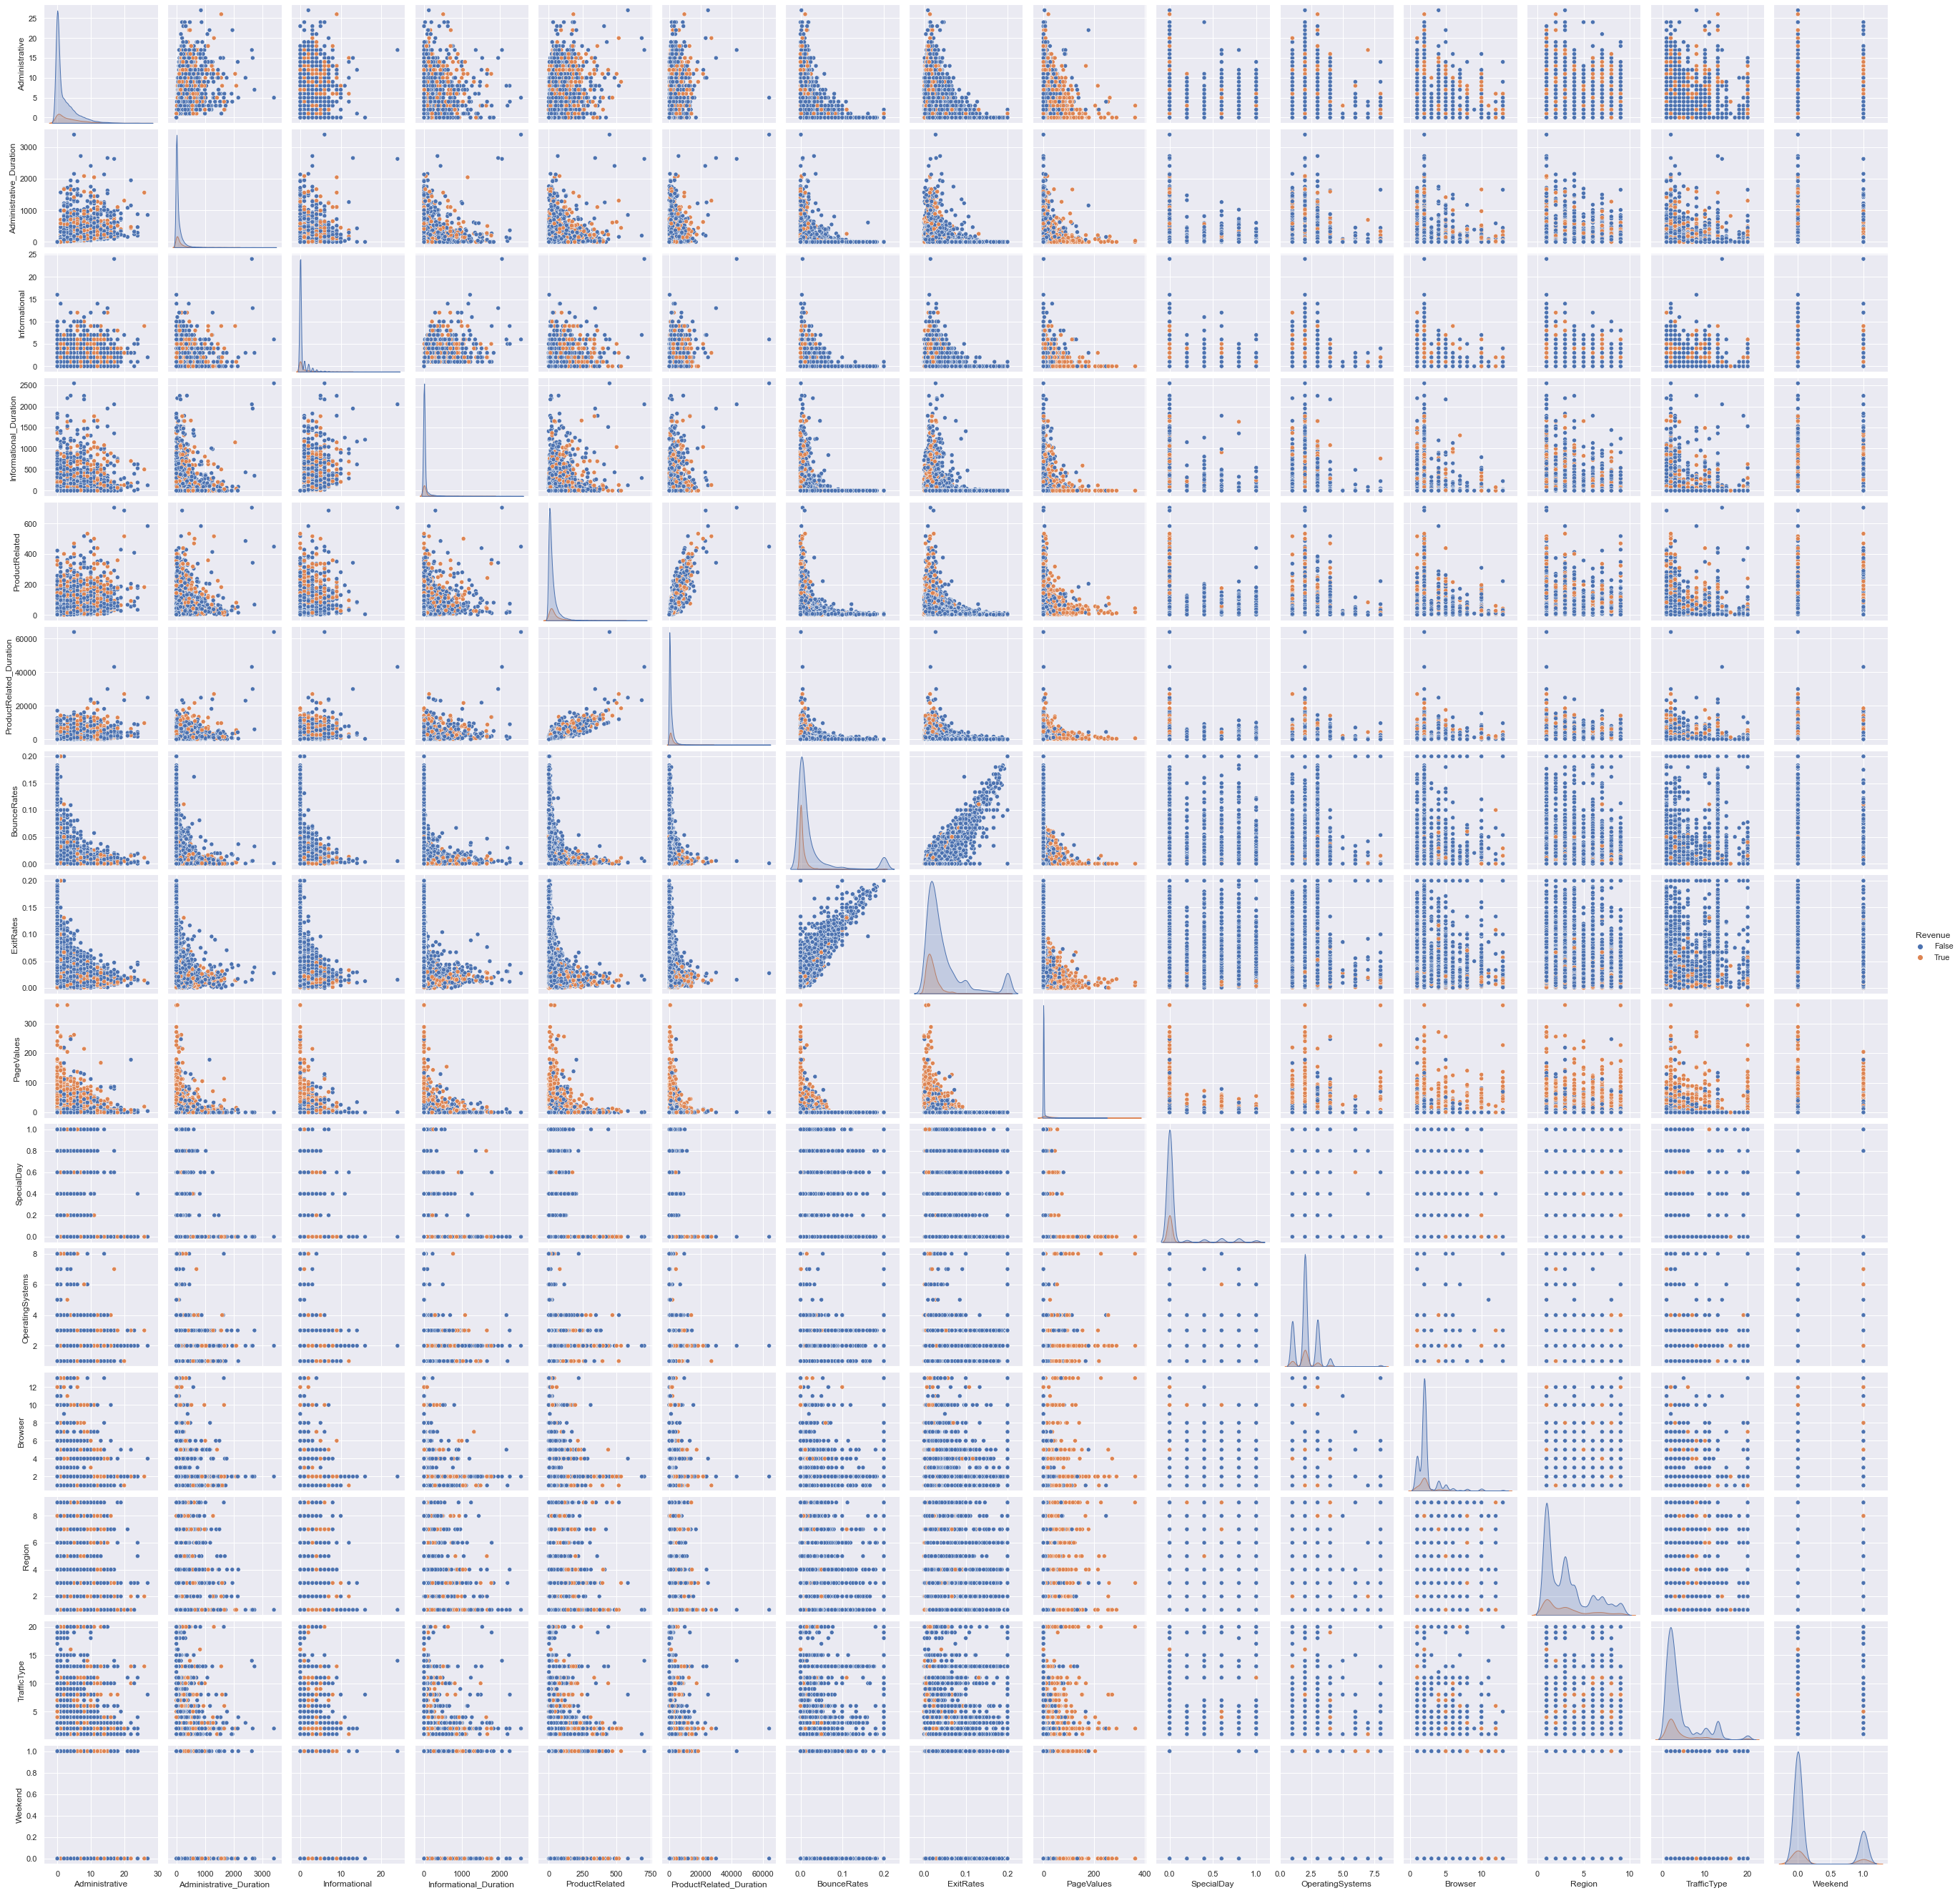

In [22]:
sns.pairplot(df, hue='Revenue')

In [23]:
df = pd.get_dummies(df)

In [24]:
pd.options.display.max_columns = None
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,0,1


**Abstract** 

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

**Data Set Information**

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

**Attribute Information**

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute will be used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

[Data Source](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

In [25]:
training, val = train_test_split(df, train_size=0.80, random_state=32, stratify=df['Revenue'])
train, test = train_test_split(training, train_size=0.80, random_state=32, stratify=training['Revenue'])

X_train = train.drop(columns=['Revenue'])
y_train = train['Revenue']

X_test = test.drop(columns=['Revenue'])
y_test = test['Revenue']

X_val = val.drop(columns=['Revenue'])
y_val = val['Revenue']

<br><br>

## Passive Aggrissive Classifier
<hr>

### Instantiate, Train and Score Passive Aggrissive Classifier

In [26]:
pac_clf = PassiveAggressiveClassifier().fit(X_train, y_train)
pac_clf.score(X_train, y_train)

0.8331010011405399

### Test Passive Aggrissive Classifier

In [27]:
pac_y_test_pred = pac_clf.predict(X_test)

In [28]:
print(classification_report(y_test, pac_y_test_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.90      0.91      0.90      1668
     Revenue       0.47      0.41      0.44       305

    accuracy                           0.84      1973
   macro avg       0.68      0.66      0.67      1973
weighted avg       0.83      0.84      0.83      1973



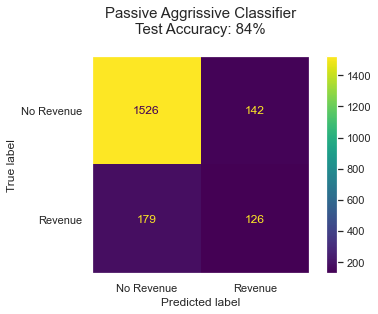

In [29]:
pac_test_acc = round(accuracy_score(y_test, pac_y_test_pred) * 100)
plot_confusion_matrix(pac_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Passive Aggrissive Classifier\nTest Accuracy: {pac_test_acc}%\n', size=15)
plt.grid(False)

### Validate Passive Aggrissive Classifier

In [30]:
pac_y_val_pred = pac_clf.predict(X_val)

In [31]:
print(classification_report(y_val, pac_y_val_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.90      0.92      0.91      2084
     Revenue       0.50      0.46      0.47       382

    accuracy                           0.84      2466
   macro avg       0.70      0.69      0.69      2466
weighted avg       0.84      0.84      0.84      2466



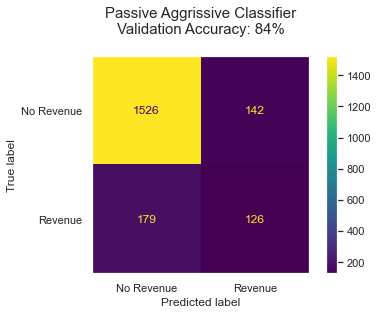

In [32]:
pac_val_acc = round(accuracy_score(y_val, pac_y_val_pred) * 100)
plot_confusion_matrix(pac_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Passive Aggrissive Classifier\nValidation Accuracy: {pac_val_acc}%\n', size=15)
plt.grid(False)

<br><br>

## Support Vector Classifier
<hr>

### Instantiate, Train and Score Support Vector Classifier

In [33]:
svc_clf = SVC().fit(X_train, y_train)
svc_clf.score(X_train, y_train)

0.8470409327081485

### Test Support Vector Classifier

In [34]:
svc_y_test_pred = svc_clf.predict(X_test)

In [35]:
print(classification_report(y_test, svc_y_test_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.85      1.00      0.92      1668
     Revenue       1.00      0.01      0.01       305

    accuracy                           0.85      1973
   macro avg       0.92      0.50      0.46      1973
weighted avg       0.87      0.85      0.78      1973



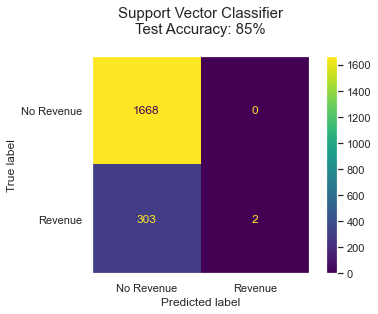

In [36]:
svc_test_acc = round(accuracy_score(y_test, svc_y_test_pred) * 100)
plot_confusion_matrix(svc_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Support Vector Classifier\nTest Accuracy: {svc_test_acc}%\n', size=15)
plt.grid(False)

### Validate Support Vector Classifier

In [37]:
svc_y_val_pred = svc_clf.predict(X_val)

In [38]:
print(classification_report(y_val, svc_y_val_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.85      1.00      0.92      2084
     Revenue       0.75      0.01      0.02       382

    accuracy                           0.85      2466
   macro avg       0.80      0.50      0.47      2466
weighted avg       0.83      0.85      0.78      2466



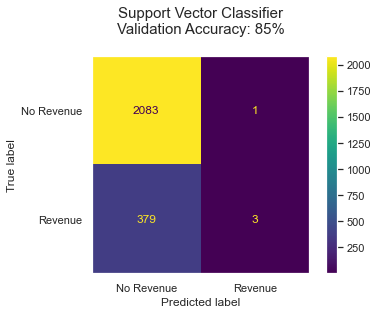

In [39]:
svc_val_acc = round(accuracy_score(y_val, svc_y_val_pred) * 100)
plot_confusion_matrix(svc_clf, X_val, y_val, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Support Vector Classifier\nValidation Accuracy: {svc_val_acc}%\n', size=15)
plt.grid(False)

<br><br>

## Random Forest Classifier
<hr>

### Instantiate, Train and Score Random Forest Classifier

In [40]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_clf.score(X_train, y_train)

0.9998732733493854

### Test Random Forest Classifier

In [41]:
rf_y_test_pred = rf_clf.predict(X_test)

In [42]:
print(classification_report(y_test, rf_y_test_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.92      0.97      0.95      1668
     Revenue       0.77      0.55      0.64       305

    accuracy                           0.91      1973
   macro avg       0.85      0.76      0.79      1973
weighted avg       0.90      0.91      0.90      1973



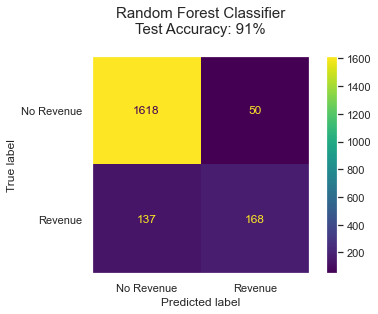

In [43]:
rf_test_acc = round(accuracy_score(y_test, rf_y_test_pred) * 100)
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Random Forest Classifier\nTest Accuracy: {rf_test_acc}%\n', size=15)
plt.grid(False)

### Validate Random Forest Classifier

In [44]:
rf_y_val_pred = rf_clf.predict(X_val)

In [45]:
print(classification_report(y_val, rf_y_val_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       0.92      0.97      0.95      2084
     Revenue       0.79      0.54      0.64       382

    accuracy                           0.91      2466
   macro avg       0.86      0.76      0.80      2466
weighted avg       0.90      0.91      0.90      2466



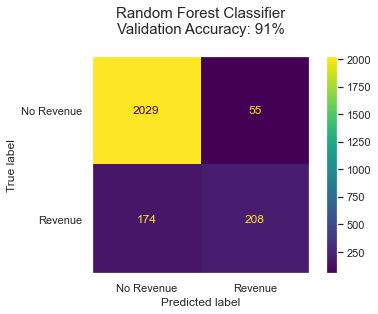

In [46]:
rf_val_acc = round(accuracy_score(y_val, rf_y_val_pred) * 100)
plot_confusion_matrix(rf_clf, X_val, y_val, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Random Forest Classifier\nValidation Accuracy: {rf_val_acc}%\n', size=15)
plt.grid(False)